In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from google.colab import files
import io

uploaded = files.upload()   # Upload online_retail_sample.csv
fname = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[fname]))
df.head()


Saving online_retail_sample.csv to online_retail_sample.csv


,CustomerID,InvoiceDate,Amount
0,CUST1000,2021-12-16,1291.89
1,CUST1000,2020-05-24,141.62
2,CUST1001,2021-05-05,439.30
3,CUST1001,2021-07-16,775.36
4,CUST1001,2022-01-23,380.15


In [2]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
print("Date range:", df['InvoiceDate'].min(), "to", df['InvoiceDate'].max())
df.head()


Date range: 2020-01-01 00:00:00 to 2022-09-26 00:00:00


,CustomerID,InvoiceDate,Amount
0,CUST1000,2021-12-16,1291.89
1,CUST1000,2020-05-24,141.62
2,CUST1001,2021-05-05,439.30
3,CUST1001,2021-07-16,775.36
4,CUST1001,2022-01-23,380.15


In [3]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
print("Date range:", df['InvoiceDate'].min(), "to", df['InvoiceDate'].max())
df.head()


Date range: 2020-01-01 00:00:00 to 2022-09-26 00:00:00


,CustomerID,InvoiceDate,Amount
0,CUST1000,2021-12-16,1291.89
1,CUST1000,2020-05-24,141.62
2,CUST1001,2021-05-05,439.30
3,CUST1001,2021-07-16,775.36
4,CUST1001,2022-01-23,380.15


In [4]:
# Snapshot date = last date + 1
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'CustomerID': 'count',                                   # Frequency
    'Amount': 'sum'                                          # Monetary
}).rename(columns={'InvoiceDate':'Recency',
                   'CustomerID':'Frequency',
                   'Amount':'Monetary'}).reset_index()

rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,CUST1000,285,2,1433.51
1,CUST1001,247,5,2268.51
2,CUST1002,379,5,2316.48
3,CUST1003,67,7,2491.65
4,CUST1004,288,4,1568.46


In [5]:
rfm['R_score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1]).astype(int)
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(int)
rfm['M_score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5]).astype(int)

rfm['RFM_Score'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)
rfm.head()


,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
0,CUST1000,285,2,1433.51,2,1,2,212
1,CUST1001,247,5,2268.51,2,3,4,234
2,CUST1002,379,5,2316.48,1,3,4,134
3,CUST1003,67,7,2491.65,4,4,4,444
4,CUST1004,288,4,1568.46,1,2,2,122


In [6]:
def segment(row):
    if row['R_score']>=4 and row['F_score']>=4 and row['M_score']>=4:
        return 'Champions'
    if row['R_score']>=3 and row['F_score']>=3 and row['M_score']>=3:
        return 'Loyal'
    if row['R_score']<=2 and row['F_score']<=2 and row['M_score']<=2:
        return 'At Risk'
    return 'Potential'

rfm['Segment'] = rfm.apply(segment, axis=1)

rfm['Segment'].value_counts()


,count
Segment,
Potential,53
Champions,23
At Risk,22
Loyal,22


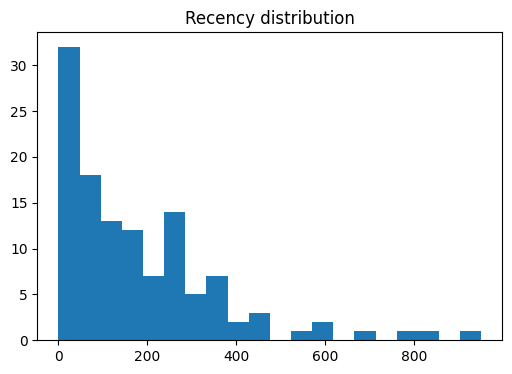

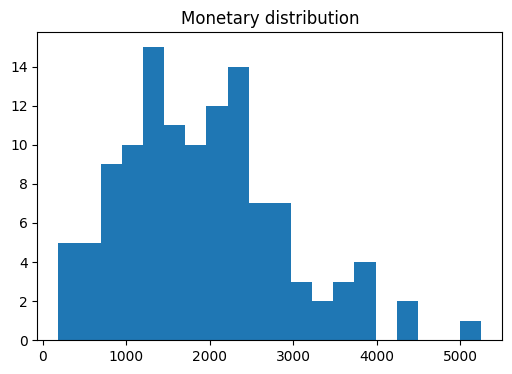

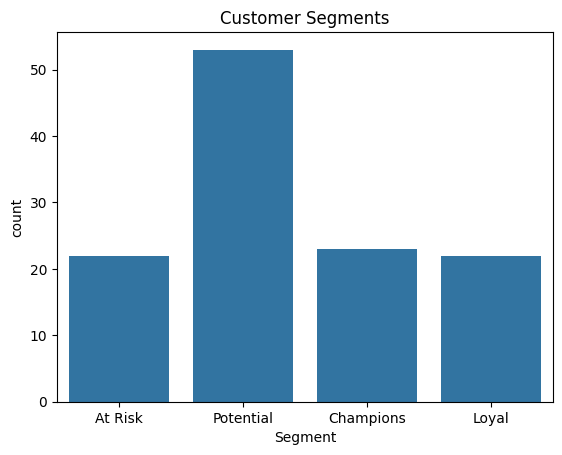

In [7]:
plt.figure(figsize=(6,4))
plt.hist(rfm['Recency'], bins=20)
plt.title('Recency distribution')
plt.show()

plt.figure(figsize=(6,4))
plt.hist(rfm['Monetary'], bins=20)
plt.title('Monetary distribution')
plt.show()

sns.countplot(x='Segment', data=rfm)
plt.title('Customer Segments')
plt.show()


In [8]:
rfm.to_csv('rfm_output.csv', index=False)

from google.colab import files
files.download('rfm_output.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>